In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import datetime as dt
from sklearn.linear_model import LinearRegression

In [13]:
# URL for raw file
csv_url = 'https://github.com/nytimes/covid-19-data/raw/master/us-counties.csv'

In [14]:
df = pd.read_csv(csv_url)
df['date'] = pd.to_datetime(df['date'])

df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


In [15]:
# Dataframe with all oklahoma counties
okla_df = df[df['state'] == 'Oklahoma']

# Dataframe with just cherokee county data
cherokee_df = okla_df[okla_df['county'] == 'Cherokee']
cherokee_df.reset_index(inplace = True, drop = True)

cherokee_df.head()

,date,county,state,fips,cases,deaths
0,2020-03-27,Cherokee,Oklahoma,40021.0,1,0
1,2020-03-28,Cherokee,Oklahoma,40021.0,1,0
2,2020-03-29,Cherokee,Oklahoma,40021.0,1,0
3,2020-03-30,Cherokee,Oklahoma,40021.0,1,0
4,2020-03-31,Cherokee,Oklahoma,40021.0,4,0


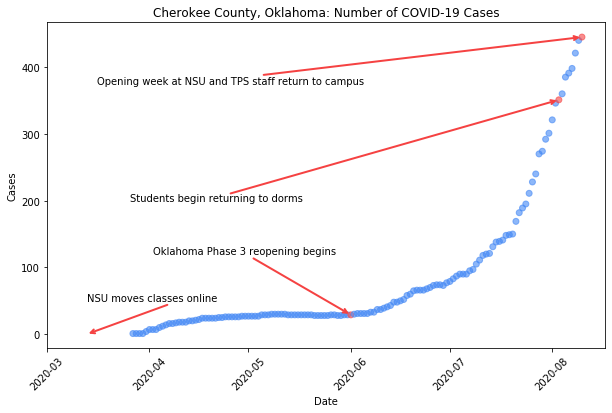

In [16]:
notes = {'nsucloses' : dt.datetime(2020, 3, 13),
         'reopening' : dt.datetime(2020, 6, 1),
         'movein' : dt.datetime(2020, 8, 3),
         'firstweek' : dt.datetime(2020, 8, 10),
         'nsustarts' : dt.datetime(2020, 8, 17),
         'tpsstarts' : dt.datetime(2020, 8, 27)}

# Points with a note will be plotted in red
colors = np.array(['#4287f5' for i in range(cherokee_df.shape[0])])
for i in range(len(colors)):
    if cherokee_df.iloc[i, 0] in set(notes.values()):
        colors[i] = '#f54242'

# Create plot
fig, ax = plt.subplots(figsize = (10, 6))
ax.scatter(cherokee_df['date'], cherokee_df['cases'], color = colors, alpha = 0.6)
plt.title('Cherokee County, Oklahoma: Number of COVID-19 Cases')
plt.ylabel('Cases')
plt.xlabel('Date')
plt.xticks(rotation = 45)
ax.set_xlim([dt.date(2020, 3, 1), cherokee_df['date'].max() + dt.timedelta(7, 0)])

# Annotate arrows
plt.annotate('',
             xy=(mdates.date2num(notes['nsucloses']), 0),
             xytext=(mdates.date2num(notes['nsucloses']) + 25, 45),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['reopening']), 29),
             xytext=(mdates.date2num(notes['reopening']) - 30, 115),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['movein']), 351),
             xytext=(mdates.date2num(notes['movein']) - 100, 210),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

plt.annotate('',
             xy=(mdates.date2num(notes['firstweek']), 445),
             xytext=(mdates.date2num(notes['movein']) - 90, 388),
             xycoords='data',
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='#f54242', lw=2)
            )

# Text notes
plt.text(mdates.date2num(notes['nsucloses']), 50, 'NSU moves classes online')
plt.text(mdates.date2num(notes['reopening']) - 60, 120, 'Oklahoma Phase 3 reopening begins')
plt.text(mdates.date2num(notes['movein']) - 130, 200, 'Students begin returning to dorms')
plt.text(mdates.date2num(notes['firstweek']) - 147, 375, 'Opening week at NSU and TPS staff return to campus')

fig.savefig('cherokee_cases.png')
plt.show()

In [17]:
cherokee_df[cherokee_df['date'] == notes['movein']]

,date,county,state,fips,cases,deaths
129,2020-08-03,Cherokee,Oklahoma,40021.0,351,1


In [18]:
cherokee_df[cherokee_df['date'] == notes['reopening']]

,date,county,state,fips,cases,deaths
66,2020-06-01,Cherokee,Oklahoma,40021.0,29,1


In [19]:
list(notes.values())

[datetime.datetime(2020, 3, 13, 0, 0),
 datetime.datetime(2020, 6, 1, 0, 0),
 datetime.datetime(2020, 8, 3, 0, 0),
 datetime.datetime(2020, 8, 10, 0, 0),
 datetime.datetime(2020, 8, 17, 0, 0),
 datetime.datetime(2020, 8, 27, 0, 0)]

In [20]:
cherokee_df.iloc[136, :]

date      2020-08-10 00:00:00
county               Cherokee
state                Oklahoma
fips                    40021
cases                     445
deaths                      2
Name: 136, dtype: object

In [21]:
len(range(cherokee_df.shape[0]))

137

In [22]:
cherokee_df['date']

0     2020-03-27
1     2020-03-28
2     2020-03-29
3     2020-03-30
4     2020-03-31
         ...    
132   2020-08-06
133   2020-08-07
134   2020-08-08
135   2020-08-09
136   2020-08-10
Name: date, Length: 137, dtype: datetime64[ns]